# ACORN-SAT using Python and Jupyter Notebook

## Let's load some data...

In [49]:
import io
import requests
import pandas as pd

response = requests.get('http://www.bom.gov.au/climate/change/acorn/sat/data/acorn.sat.minT.086071.daily.txt')
file_object = io.StringIO(response.content.decode('utf-8'))

tmin_melb = pd.read_csv(file_object)

tmin_melb.head()

,MIN TEMP 086071 19100101 20150106 missing_value=99999.9 MELBOURNE REGIONAL OFFICE
0,19100101 9.9
1,19100102 14.5
2,19100103 24.3
3,19100104 17.7
4,19100105 13.8


In [50]:
import io
import requests
import pandas as pd

url = "http://www.bom.gov.au/climate/change/acorn/sat/data/acorn.sat.minT.086071.daily.txt"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)
data = io.StringIO(req.text)

tmin_melb = pd.read_csv(data, delimiter='\s+', skiprows=1, names=['date', 'tmin'], na_values='99999.9',)

tmin_melb.head()

,date,tmin
0,19100101,9.9
1,19100102,14.5
2,19100103,24.3
3,19100104,17.7
4,19100105,13.8


In [51]:
import pandas as pd

tmin_melb = pd.read_csv('BoM/86071_tmin.csv', delimiter='\s+', skiprows=1,)

tmin_melb.head()

,19100101,9.9
0,19100102,14.5
1,19100103,24.3
2,19100104,17.7
3,19100105,13.8
4,19100106,16.9


In [52]:
import io
import requests
import pandas as pd
import datetime

# Function to convert YYYYMMDD to Python datetime
def make_date(n):
    return datetime.datetime.strptime(n, '%Y%m%d')

url = "http://www.bom.gov.au/climate/change/acorn/sat/data/acorn.sat.minT.086071.daily.txt"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)
data = io.StringIO(req.text)


tmin_melb = pd.read_csv(data, delimiter='\s+', skiprows=1, names=['date', 'tmin'], na_values='99999.9',
                       index_col=0, converters={'date':make_date})

tmin_melb.head(5)

,tmin
date,
1910-01-01,9.9
1910-01-02,14.5
1910-01-03,24.3
1910-01-04,17.7
1910-01-05,13.8


In [53]:
# http://www.bom.gov.au/climate/change/hqsites/data/temp/tmin.086338.daily.csv
import io
import requests
import pandas as pd
import datetime

# Function to convert YYYYMMDD to Python datetime
def make_date(n):
    return datetime.datetime.strptime(n, '%Y-%m-%d')

url = "http://www.bom.gov.au/climate/change/hqsites/data/temp/tmin.086338.daily.csv"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)
data = io.StringIO(req.text)

tmin_melb = pd.read_csv(data, skiprows=2,  index_col=0, usecols=[0,1], names=['date', 'tmin'],
                       converters={'date': make_date})
tmin_melb.head(5)

,tmin
date,
1910-01-01,10.1
1910-01-02,13.5
1910-01-03,23.3
1910-01-04,16.6
1910-01-05,13.0


In [54]:
import io
import requests
import pandas as pd
import datetime

# Function to convert YYYYMMDD to Python datetime
def make_date(n):
    return pd.to_datetime(n, format='%Y%m%d')


# Get tmin for Melbourne
url = "http://www.bom.gov.au/climate/change/acorn/sat/data/acorn.sat.minT.086071.daily.txt"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)
data = io.StringIO(req.text)
tmin_melb = pd.read_csv(data, delimiter='\s+', skiprows=1, names=['date', 'tmin'], na_values='99999.9',
                       index_col=0, converters={'date':make_date})

# Get tmax for Melbourne
url = "http://www.bom.gov.au/climate/change/acorn/sat/data/acorn.sat.maxT.086071.daily.txt"
req = requests.get(url, headers=headers)
data = io.StringIO(req.text)
tmax_melb = pd.read_csv(data, delimiter='\s+', skiprows=1, names=['date', 'tmax'], na_values='99999.9',
                       index_col=0, converters={0:make_date})

tmax_melb.head(5)

,tmax
date,
1910-01-01,30.7
1910-01-02,38.6
1910-01-03,36.9
1910-01-04,23.3
1910-01-05,28.5


In [55]:
import pandas as pd

tall_melb = tmin_melb.join(tmax_melb, how='outer')
tall_melb.head(10)

,tmin,tmax
date,,
1910-01-01,9.9,30.7
1910-01-02,14.5,38.6
1910-01-03,24.3,36.9
1910-01-04,17.7,23.3
1910-01-05,13.8,28.5
1910-01-06,16.9,32.6
1910-01-07,17.2,29.6
1910-01-08,17.8,36.2
1910-01-09,18.3,27.3


In [56]:
tall_melb['tmean'] = (tall_melb['tmin'] + tall_melb['tmax']) / 2
tall_melb.head(10)

,tmin,tmax,tmean
date,,,
1910-01-01,9.9,30.7,20.30
1910-01-02,14.5,38.6,26.55
1910-01-03,24.3,36.9,30.60
1910-01-04,17.7,23.3,20.50
1910-01-05,13.8,28.5,21.15
1910-01-06,16.9,32.6,24.75
1910-01-07,17.2,29.6,23.40
1910-01-08,17.8,36.2,27.00
1910-01-09,18.3,27.3,22.80


In [57]:
tall_melb['tave'] = (tall_melb['tmin'].shift(1) + tall_melb['tmax']) / 2
tall_melb.head(10)

,tmin,tmax,tmean,tave
date,,,,
1910-01-01,9.9,30.7,20.30,NaN
1910-01-02,14.5,38.6,26.55,24.25
1910-01-03,24.3,36.9,30.60,25.70
1910-01-04,17.7,23.3,20.50,23.80
1910-01-05,13.8,28.5,21.15,23.10
1910-01-06,16.9,32.6,24.75,23.20
1910-01-07,17.2,29.6,23.40,23.25
1910-01-08,17.8,36.2,27.00,26.70
1910-01-09,18.3,27.3,22.80,22.55


In [58]:
tall_melb.describe()

,tmin,tmax,tmean,tave
count,38333.000000,38349.000000,38325.000000,38324.000000
mean,11.197063,20.294086,15.744868,15.744960
std,4.079829,6.188608,4.736621,4.552461
min,-0.400000,7.000000,4.200000,3.750000
25%,8.300000,15.600000,12.100000,12.150000
50%,11.000000,19.200000,15.150000,15.250000
75%,13.900000,23.600000,18.700000,18.750000
max,28.800000,46.400000,35.450000,36.250000


In [59]:
tall_melb = tall_melb.drop('tave', axis=1)
tall_melb.head(10)

,tmin,tmax,tmean
date,,,
1910-01-01,9.9,30.7,20.30
1910-01-02,14.5,38.6,26.55
1910-01-03,24.3,36.9,30.60
1910-01-04,17.7,23.3,20.50
1910-01-05,13.8,28.5,21.15
1910-01-06,16.9,32.6,24.75
1910-01-07,17.2,29.6,23.40
1910-01-08,17.8,36.2,27.00
1910-01-09,18.3,27.3,22.80


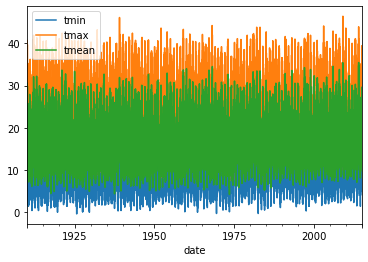

In [60]:

%matplotlib inline

tall_melb.plot()

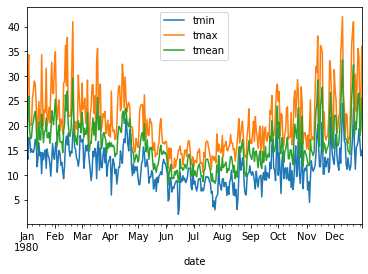

In [61]:
tall_melb['1980-01-01':'1980-12-31'].plot()

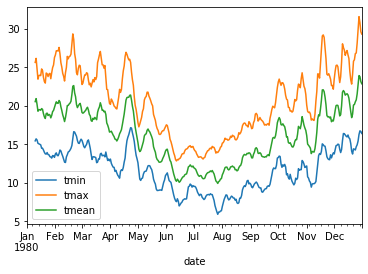

In [62]:
tall_melb['1980-01-01':'1980-12-31'].rolling(10).mean().plot()

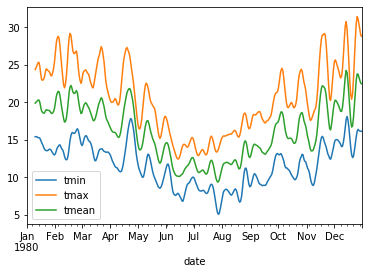

In [63]:
%matplotlib inline

tall_melb['1980-01-01':'1980-12-31'].rolling(10, win_type='triang').mean().plot() 
# boxcar triang blackman hamming bartlett parzen bohman blackmanharris nuttall barthann

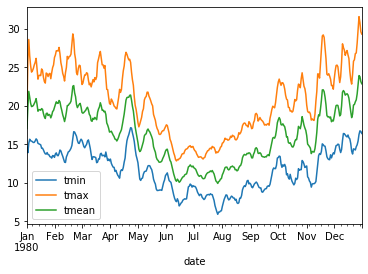

In [64]:
%matplotlib inline

# Can also use an offset - e.g. number of days...
tall_melb['1980-01-01':'1980-12-31'].rolling('10d').mean().plot()

In [65]:
# Group by month...

mnth_melb = tall_melb.groupby(by=tall_melb.index.month)
mnth_melb.mean()

,tmin,tmax,tmean
date,,,
1,15.121448,26.497607,20.807753
2,15.640520,26.570971,21.104217
3,14.318358,24.471543,19.392510
4,11.808164,20.659320,16.233174
5,9.739422,17.077020,13.407103
6,7.798156,14.384413,11.090782
7,7.058838,13.961905,10.509776
8,7.710879,15.391948,11.552490
9,8.973920,17.692029,13.333651


In [66]:
# Find the monthly climatology for Melbourne...

clim = tall_melb['1961-01-01':'1991-01-01']
clim.groupby(by=clim.index.month).mean()

,tmin,tmax,tmean
date,,,
1,15.608710,26.479699,21.042473
2,16.035106,26.656080,21.338416
3,14.764293,24.635591,19.691963
4,12.379867,20.934222,16.654672
5,10.114871,17.255376,13.685560
6,7.746763,14.461667,11.102623
7,7.005274,13.984516,10.494080
8,7.990635,15.407527,11.700969
9,9.259177,17.452667,13.356618


In [67]:
tall_melb['tmax'] > 42

date
1910-01-01    False
1910-01-02    False
1910-01-03    False
1910-01-04    False
1910-01-05    False
              ...  
2015-01-02    False
2015-01-03    False
2015-01-04    False
2015-01-05    False
2015-01-06    False
Name: tmax, Length: 38357, dtype: bool

In [68]:
# Find all days with max temp > 42

# tall_melb['tmax'] > 42
tall_melb[tall_melb['tmax'] > 42]

,tmin,tmax,tmean
date,,,
1921-01-24,20.6,42.4,31.50
1932-01-19,17.5,43.2,30.35
1939-01-08,19.0,43.6,31.30
1939-01-10,16.8,45.2,31.00
1939-01-13,17.7,46.1,31.90
1939-02-13,17.2,42.1,29.65
1940-03-11,19.1,42.1,30.60
1943-01-31,17.5,42.4,29.95
1952-01-23,16.6,43.6,30.10


In [69]:
# Look at correlation...

tall_melb['tmax'].corr(tall_melb['tmin'])

0.6896692315295819

In [70]:
tall_melb.corr()

,tmin,tmax,tmean
tmin,1.000000,0.689669,0.881093
tmax,0.689669,1.000000,0.950132
tmean,0.881093,0.950132,1.000000


In [71]:
tall_melb.quantile(0.5)

tmin     11.00
tmax     19.20
tmean    15.15
Name: 0.5, dtype: float64

In [72]:
tall_melb.quantile([0.1, 0.5, 0.9])

,tmin,tmax,tmean
0.1,6.2,13.5,10.20
0.5,11.0,19.2,15.15
0.9,16.6,29.3,22.20


In [73]:
tall_melb.quantile([0.1, 0.5, 0.9], interpolation='lower') # linear’, ‘lower’, ‘higher’, ‘midpoint’, ‘nearest’

,tmin,tmax,tmean
0.1,6.2,13.5,10.20
0.5,11.0,19.2,15.15
0.9,16.6,29.3,22.20


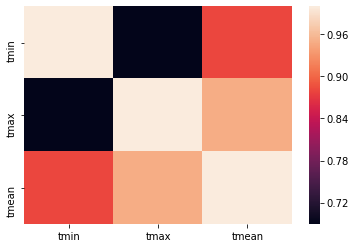

In [96]:
import seaborn as sns

correlations = tall_melb.corr()
sns.heatmap(correlations)

In [97]:
# Find the 10 hottest days in Melbourne

tall_melb.sort_values(by='tmax', ascending=False).head(10)

,tmin,tmax,tmean
date,,,
2009-02-07,18.7,46.4,32.55
1939-01-13,17.7,46.1,31.90
1939-01-10,16.8,45.2,31.00
2009-01-30,25.7,45.1,35.40
2009-01-29,25.7,44.3,35.00
1968-01-31,19.5,44.2,31.85
2003-01-25,17.3,44.1,30.70
2014-01-17,25.6,43.9,34.75
2014-01-16,27.0,43.9,35.45


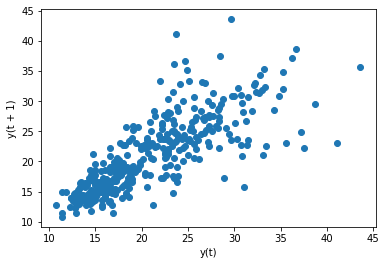

In [98]:
pd.plotting.lag_plot(tall_melb['2010-01-01':'2011-01-01']['tmax'])

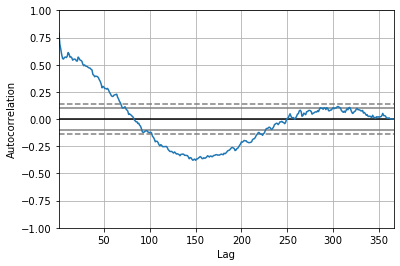

In [99]:
pd.plotting.autocorrelation_plot(tall_melb['2010-01-01':'2011-01-01']['tmax'])

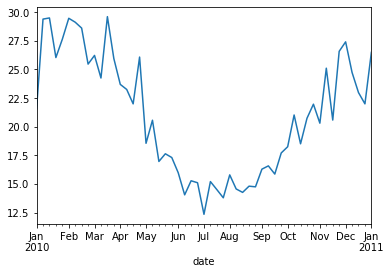

In [100]:
resampled = tall_melb['2010-01-01':'2011-01-01'].tmax.resample('W').mean()
resampled.plot()

In [101]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('acorn.db')

stations = pd.read_sql_query("SELECT * FROM stations", conn, index_col='stn_num')
stations.head(10)

DatabaseError: Execution failed on sql 'SELECT * FROM stations': no such table: stations

In [0]:
stations[['lat', 'lon']].values

In [0]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 

ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.set_extent([100, 170, -40, -5])         
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

plt.show()

In [0]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 

ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.set_extent([100, 170, -40, -5])         
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.scatter(stations.lon.values,stations.lat.values,transform=ccrs.PlateCarree())
plt.show()
# plt.savefig('acornsat.svg')

In [0]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('acorn.db')

data = pd.read_sql_query("""
    SELECT stn_num, lsd, prcp, t_min, t_max 
    FROM observations
    WHERE lsd >= '1960-01-01'
     AND  lsd < 1991-01-01
    """, conn)
data.head(10)

In [0]:
data.groupby(by=data.stn_num).mean()


In [0]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('acorn.db')

data = pd.read_sql_query("""
    SELECT stn_num, lsd, prcp, t_min, t_max 
    FROM observations
    WHERE lsd == '1960-01-01'
    """, conn)
data.head(10)


In [0]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('acorn.db')

data = pd.read_sql_query("""
    SELECT lat, lon, s.stn_num,  t_max 
    FROM observations o, stations s
    WHERE lsd == '2005-01-01'
    AND o.stn_num = s.stn_num
    """, conn)
data.head(10)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

y = data.lat.values 
x = data.lon.values 
t = data.t_max.values
plt.scatter(x, y)
# plt.scatter(data.lon.values,data.lat.values)


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

y = data.lat.values 
x = data.lon.values 
t = data.t_max.values
plt.scatter(x, y, c=t)
plt.colorbar()

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

y = data.lat.values 
x = data.lon.values 
t = data.t_max.values
plt.scatter(x, y, c=t, s=t*5, alpha=0.5, cmap='plasma')
plt.colorbar()

In [0]:
import numpy as np
from scipy.interpolate import griddata

X, Y = np.meshgrid(np.linspace(110,155,100), np.linspace(-45,-10,100))

#perform the gridding
grid_temp = griddata((x,y), t, (X, Y))

# plt.clf()
plt.contourf(X,Y,grid_temp, cmap='plasma')
plt.colorbar()

In [0]:
x = tall_melb['1961-01-01':'1991-01-01'].tmin.rolling(5).mean()
x.quantile(0.1)
# tall_melb['1961-01-01':'1991-01-01'].tmin.quantile(0.1)

In [0]:
x = tall_melb['1961-01-01':'1991-01-01'].tmin.rolling(5).mean()
q10 = x.quantile(0.1)
print(q10)
pop = tall_melb['1999-01-01':'2000-01-01']
total = pop.tmin.count()
sub = pop.tmin[pop.tmin < q10].count()
(sub / total) * 100

In [0]:
import math

# a = [1, 1, 1, 1, 1, 1]

a = [1, 1, 1, 2, 3, 5, 7, 7, 11, 13, 13, 13]

b = [min(1, abs(x-y)) for x, y in zip(a, a[1:])] 


p = (b + [1]).index(1)
print(p)
a[:p] = [math.nan] * p
try:
    p = (b[::-1]).index(1)
    a[-p:] = [math.nan] * p
except:
    pass

a


In [0]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# fig = plt.figure()
ax = plt.axes(projection="3d")

plt.show()

In [0]:
# fig = plt.figure()
ax = plt.axes(projection="3d")

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = 15 * np.random.random(100)
x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()
